# PRACTICA 3: REGRESIÓN LOGÍSTICA MULTICLASE Y REDES NEURONALES

## 1. Regresión logística multi-clase

Vamos a aplicar regresión logística multivariable para reconocer números a partir de imágenes de estos escritos a mano

**Step 1:** imports

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.figure import Figure
import numpy as np
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from scipy.io import loadmat

**Datos de entrada:** 
- Ejemplo de entrenamiento: Matriz de píxeles 20 x 20
- Datos de entrada : **X** = vector de 400 componentes (equivale a la matriz desplegada)

**Step 2**: lectura de datos y aplicar regresión logística

In [2]:
def sigmoide(z):
    return 1 / (1 + np.exp(-1*z))


In [3]:
def coste(cThetas, mX, cY, lamb):
    cThetas = np.matrix(cThetas).transpose()
    gX = sigmoide(np.dot(mX, cThetas))
    
    s1 = np.dot((np.log(gX)).transpose(), cY)
    s2 = np.dot((np.log(1 - gX)).transpose(), 1 - cY)
    # Es una matriz de 1x1
    vs = np.ravel((-1/float(len(mX)))*(s1 + s2))[0]
    vs = vs + (lamb/2*len(mX)) * np.ravel(np.dot(cThetas.transpose(), cThetas))[0]
    return vs

In [4]:
def gradienteCoste(thetas, mX, cY, lamb):
    lThetas = thetas * (lamb/len(mX))
    lThetas[0] = 0
    thetas = np.matrix(thetas).transpose()
    return np.ravel((1/float(len(mX))) * np.dot(mX.transpose(),(sigmoide(np.dot(mX, thetas)) - cY))) + lThetas

La siguiente función se aplica para el entrenamiento de los clasificadores:

In [6]:
def parametros(thetas, mX, mY, lamb):
    result = opt.fmin_tnc(func=coste , x0=thetas, fprime=gradienteCoste , args=(mX, mY, lamb))
    return result[0]

In [7]:
def evaluacion(cThetas, mX, mY):
    h = np.dot(mX, cThetas)
    z = sigmoide(h)
    z = (np.ravel(z) >= 0.5)
    z = (z == np.ravel(mY))
    return np.ravel(sum(z)/float(len(z))*100)[0]

In [9]:
def oneVsAll(mX, y, num_etiquetas, reg):
    thetas = []
    perc = []
    for i in range(1, num_etiquetas):
        cY = (y == i) * 1
        thetasZero = (np.matrix(np.zeros(len(mX[0])))).transpose()
        aaa = parametros(thetasZero, mX, cY, reg).transpose()
        perc += [evaluacion(np.matrix(aaa).transpose(), mX, cY)]
        thetas += [aaa]
    print (sum(perc)/len(perc))

En la siguiente función leemos los datos de entrada y llamamos a la función "oneVsAll" que entrena los 10 clasificadores y los aplica sobre los datos  de entrada para su posterior evaluacion con las salidas correspondientes y

In [10]:
def regresion():
    np.set_printoptions(threshold=np.nan)
    data = loadmat('ex3data1.mat')
    y = data ['y']
    X = data ['X']
    oneVsAll(X, y, 10, 0.1)

In [12]:
regresion()

93.69777777777777


Visualizamos una selección aleatoria de 10 ejemplos de entrenamiento

(-0.5, 199.5, 19.5, -0.5)

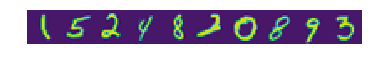

In [14]:
data = loadmat('ex3data1.mat')
y = data ['y']
X = data ['X']
sample = np.random.choice(X.shape[0],10)
plt.imshow(X[sample, : ].reshape(-1, 20).T)
plt.axis('off')

## 2. REDES NEURONALES

La siguiente función carga los datos y estima la salida con la red Neuronal, definida en la función "estimacionRedNeuronal"

In [15]:
def principal():
    weights = loadmat("ex3weights.mat")
    theta1, theta2 = weights['Theta1'], weights['Theta2']
    #theta 1 dimension 25* 401 
    # theta 2 dimension 10 * 26
    
    #cargamos los datos
    np.set_printoptions(threshold=np.nan)
    data = loadmat('ex3data1.mat')
    y = data ['y']
    X = data ['X']
    
    contEstimacionesBuenas = 0
    for i in range(0, len(X)-1):
        vX  = X[i]
        h = estimacionRedNeuronal(vX, theta1, theta2)
        #le sumamos 1 a np.argmax[h] porque consideramos que hay 10 salidas del 1 - 10, no del 0 - 9
        if(np.argmax(h) + 1 == y[i]):
            contEstimacionesBuenas += 1
    precision = contEstimacionesBuenas/len(y) * 100		
    print(precision)

In [16]:
def estimacionRedNeuronal(vX, mthetas1, mthetas2):
    cX = np.matrix(vX).transpose()
    mX = np.concatenate((np.array([[1]]), np.array(cX)), axis=0)
    z2 = np.dot(mthetas1, mX)
    #a2 es una matrix de 25 * 1
    a2 = sigmoide(z2)
    ma2 = np.concatenate((np.array([[1]]), np.array(a2)), axis=0)	
    z3 = np.dot(mthetas2, ma2)
    a3 = sigmoide(z3)
    return a3

In [17]:
principal()

97.5


Autores:
- Montserrat Sacie Alcázar
- Tomás Golomb Durán